# Loss VS angle

This notebook puts the losses to angle range bins and compares the average losses of different angle ranges over the datasets with different speeds

In [1]:
import pandas as pd

df = pd.read_csv('3D-CNN-model-results.csv.gz')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334110 entries, 0 to 334109
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          334110 non-null  int64  
 1   name                334110 non-null  object 
 2   direction           334110 non-null  object 
 3   speed               334110 non-null  float64
 4   fold                334110 non-null  int64  
 5   is_train            334110 non-null  bool   
 6   predicted_angle     334110 non-null  float64
 7   ground_truth_angle  334110 non-null  float64
dtypes: bool(1), float64(3), int64(2), object(2)
memory usage: 18.2+ MB


In [3]:
grouping_features = ['direction', 'speed', 'name', 'is_train']
df.groupby(grouping_features).predicted_angle.mean()

direction  speed  name       is_train
CC         0.80   1-1-CC-80  False      -0.291537
                  4-1-CC-80  False      -0.273735
           0.85   1-3-CC-85  False      -0.286769
                  4-3-CC-85  False      -0.279462
           0.90   1-2-CC-90  False      -0.272163
                  4-2-CC-90  False      -0.266055
                  test90     False      -0.268160
                  train90    True       -0.268748
CW         0.80   2-1-CW-80  False       0.452853
           0.85   2-3-CW-85  False       0.430050
                  3-3-CW-85  False       0.450249
           0.90   2-2-CW-90  False       0.425421
                  3-2-CW-90  False       0.425332
                  test90     False       0.427889
                  train90    True        0.424714
Name: predicted_angle, dtype: float64

In [4]:
df.groupby(grouping_features).ground_truth_angle.mean()

direction  speed  name       is_train
CC         0.80   1-1-CC-80  False      -0.179378
                  4-1-CC-80  False      -0.217245
           0.85   1-3-CC-85  False      -0.213445
                  4-3-CC-85  False      -0.232535
           0.90   1-2-CC-90  False      -0.279574
                  4-2-CC-90  False      -0.255056
                  test90     False      -0.265395
                  train90    True       -0.265395
CW         0.80   2-1-CW-80  False       0.344451
           0.85   2-3-CW-85  False       0.368073
                  3-3-CW-85  False       0.336757
           0.90   2-2-CW-90  False       0.344306
                  3-2-CW-90  False       0.394307
                  test90     False       0.384736
                  train90    True        0.384736
Name: ground_truth_angle, dtype: float64

In [7]:

import numpy as np

df['squared_error'] = np.square(df.predicted_angle - df.ground_truth_angle)

df['gt_bin'] = pd.cut(df.ground_truth_angle, bins=9).reset_index(drop = True)

df.groupby(grouping_features).squared_error.mean()


direction  speed  name       is_train
CC         0.80   1-1-CC-80  False       0.136961
                  4-1-CC-80  False       0.093826
           0.85   1-3-CC-85  False       0.118815
                  4-3-CC-85  False       0.071836
           0.90   1-2-CC-90  False       0.100601
                  4-2-CC-90  False       0.101100
                  test90     False       0.110956
                  train90    True        0.098373
CW         0.80   2-1-CW-80  False       0.077670
           0.85   2-3-CW-85  False       0.079539
                  3-3-CW-85  False       0.085307
           0.90   2-2-CW-90  False       0.082248
                  3-2-CW-90  False       0.081458
                  test90     False       0.093599
                  train90    True        0.078612
Name: squared_error, dtype: float64

In [12]:
df.groupby(['name', 'gt_bin']).squared_error.mean()

name       gt_bin          
1-1-CC-80  (-1.002, -0.778]    0.083613
           (-0.778, -0.556]    0.095773
           (-0.556, -0.333]    0.108076
           (-0.333, -0.111]    0.129900
           (-0.111, 0.111]     0.111623
                                 ...   
train90    (-0.111, 0.111]     0.064924
           (0.111, 0.333]      0.064809
           (0.333, 0.556]      0.055886
           (0.556, 0.778]      0.098528
           (0.778, 1.0]        0.114998
Name: squared_error, Length: 117, dtype: float64

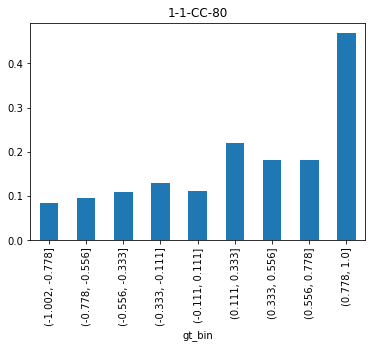

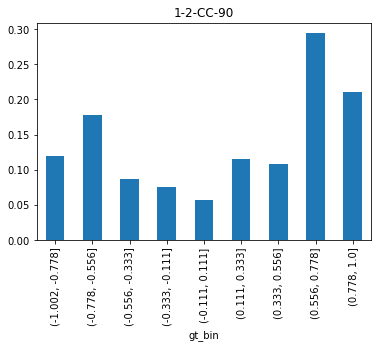

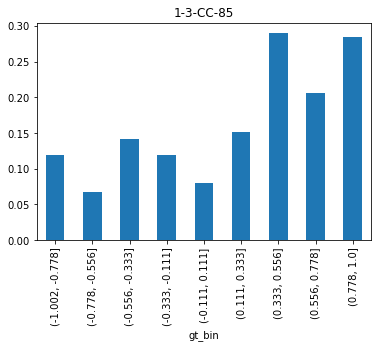

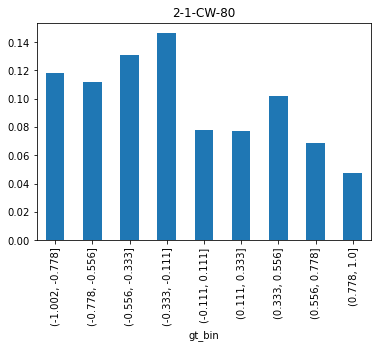

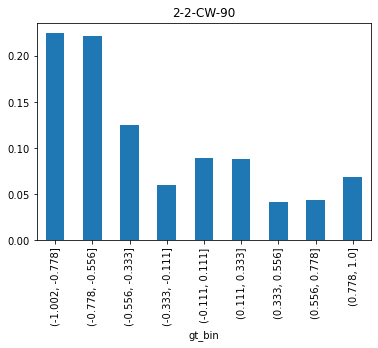

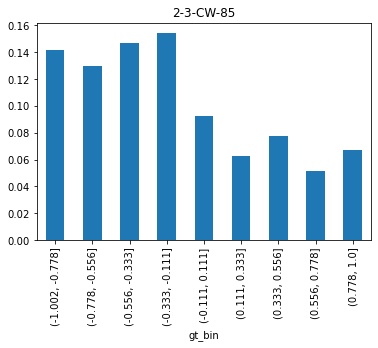

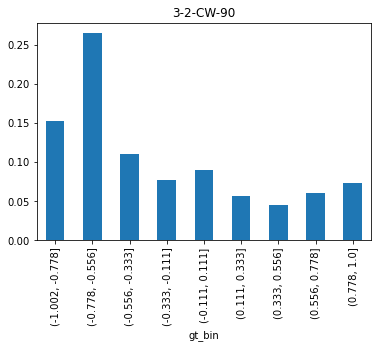

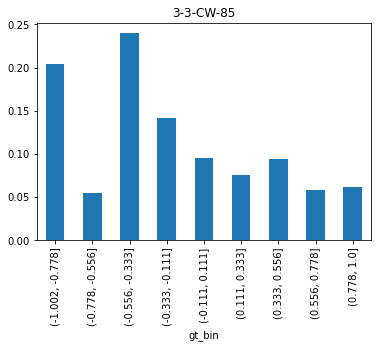

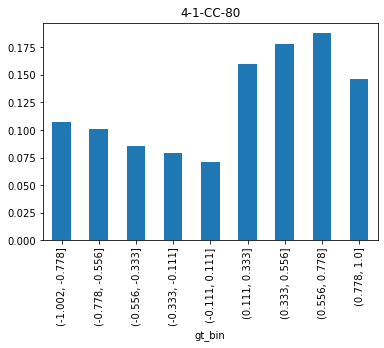

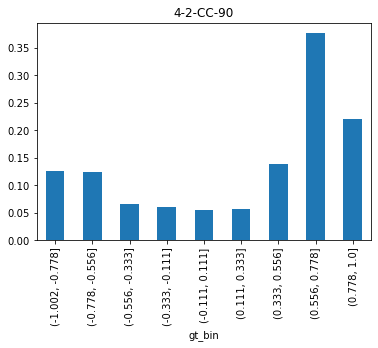

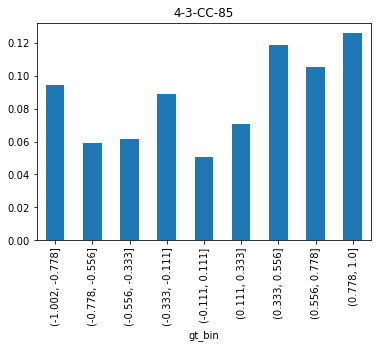

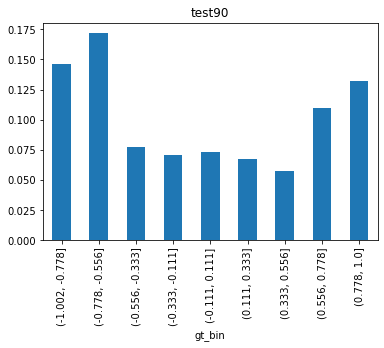

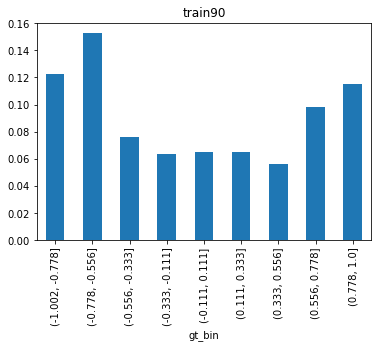

In [23]:
from matplotlib import pyplot as plt
for name in sorted(df.name.unique()):
    plt.figure()
    df[df.name == name].groupby('gt_bin').squared_error.mean().plot(kind='bar', title=name)
